# `geom_spoke()`

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


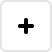
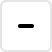
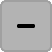
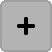
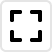
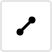
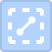
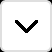
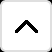
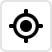
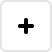
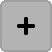
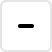
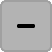
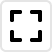
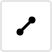
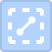
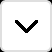
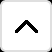
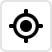

In [2]:
LetsPlot.setup_html()

#### 1. Basic Usage

In [3]:
def get_data(n, a, b, f):
    d = (b - a) / (n - 1)
    xrange = np.linspace(a, b, n)
    yrange = np.linspace(a, b, n)
    X, Y = np.meshgrid(xrange, yrange)
    x, y = X.reshape(-1), Y.reshape(-1)
    Z = f(X, Y)
    z = Z.reshape(-1)
    dY, dX = np.gradient(Z, d)
    R = np.sqrt(dX**2 + dY**2)
    normalized_R = R / R.max() * d
    A = np.arctan2(dY, dX)
    radius, angle = normalized_R.reshape(-1), A.reshape(-1)
    return pd.DataFrame({'x': x, 'y': y, 'z': z, 'radius': radius, 'angle': angle})

In [4]:
df = get_data(n=21, a=-2*np.pi, b=2*np.pi, f=lambda xarray, yarray: np.sin(xarray) + np.cos(yarray))
print(df.shape)
df.head()

(441, 5)


,x,y,z,radius,angle
0,-6.283185,-6.283185,1.000000,0.478721,-0.314159
1,-5.654867,-6.283185,1.587785,0.396934,-0.381905
2,-5.026548,-6.283185,1.951057,0.204153,-0.810479
3,-4.398230,-6.283185,1.951057,0.204153,-2.331114
4,-3.769911,-6.283185,1.587785,0.396934,-2.759688


In [5]:
p = ggplot(df, aes('x', 'y')) + coord_fixed()

In [6]:
p + geom_bin2d(aes(fill='z'), stat='identity')

In [7]:
p + geom_point(size=1.5) + geom_spoke(aes(angle='angle', radius='radius', color='z'))

#### 2. Parameter `pivot`

In [8]:
def get_plot(pivot):
    n = 4
    a, b = -2, 2
    r = .75
    pivot_df = get_data(n=n, a=a, b=b, f=lambda xarray, yarray: xarray**2 + yarray**2)
    title = "pivot={0}{1}".format(pivot, " (default)" if pivot == 'tail' else "")
    return ggplot(pivot_df, aes('x', 'y')) + \
        geom_point() + \
        geom_spoke(aes(angle='angle'), radius=r, pivot=pivot) + \
        coord_fixed() + \
        xlim(a - r, b + r) + ylim(a - r, b + r) + \
        ggtitle(title)

In [9]:
gggrid([get_plot('tail'), get_plot('mid'), get_plot('tip')], ncol=3)